In [ ]:
!pip install KneighborsClassifier

ERROR: Could not find a version that satisfies the requirement KneighborsClassifier (from versions: none)
ERROR: No matching distribution found for KneighborsClassifier


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult_data_reserved.csv')

In [ ]:
df = df.drop(['education', 'marital-status'], axis =1)
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,31,Self-emp-inc,117963,16,Prof-specialty,Own-child,White,Male,0,0,40,United-States
1,20,?,201490,10,?,Own-child,White,Male,0,0,40,United-States
2,78,Self-emp-inc,385242,13,Exec-managerial,Husband,White,Male,9386,0,45,United-States
3,32,Private,164197,13,Craft-repair,Husband,White,Male,0,0,44,United-States
4,61,Private,92691,9,Adm-clerical,Husband,White,Male,0,0,3,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
6508,42,Self-emp-not-inc,32185,13,Farming-fishing,Husband,White,Male,0,0,60,United-States
6509,34,Private,180714,10,Transport-moving,Husband,Black,Male,0,2179,40,United-States
6510,39,Private,202027,15,Prof-specialty,Husband,White,Male,0,0,45,United-States
6511,29,Private,125976,9,Sales,Unmarried,White,Female,0,0,35,United-States


In [ ]:
cat_features = ['workclass','occupation', 'relationship', 'race', 'sex', 'native-country']
print('Количество числовых признаков: ', df.select_dtypes(include=['int64']).shape[1]-1)
print('Количество нечисловых признаков: ', len(cat_features))

Количество числовых признаков:  5
Количество нечисловых признаков:  6


In [ ]:
column = 'label'
plt.gcf().set_size_inches(10,7)
sns.barplot(x=df[[column]].groupby(df[column]).count().index, y=df[column].groupby(df[column]).count().to_numpy())
print('Доля объектов класса 0: ', len(df[df[column] == 0])/len(df))

KeyError: "None of [Index(['label'], dtype='object')] are in the [columns]"

<Figure size 1000x700 with 0 Axes>

In [ ]:
random_state = 33

df_only_numeric = df.select_dtypes(include=['int64'])

def build_model(df):
  X,y = df.drop('label', axis = 1), df['label']
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state, stratify=y)
  knn = KNeighborsClassifier().fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  f_1_score = f1_score(y_test,y_pred)
  return X_train.fnlwgt.mean(), f_1_score, classification_report(y_test, y_pred, digits=3)

mean, score, report = build_model(df_only_numeric)
print('Выборочное среднее столбцов fnlwgt: ', mean)
print('F_1(WEIGHTWD) модели: ', score)
print('Отчет о классификации: \n', report)


KeyError: "['label'] not found in axis"

In [ ]:
#MinMax
def build_model(df):
  X,y = df.drop('label', axis=1), df['label']
  X_train , X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=random_state, stratify=y)
  scaler=MinMaxScaler().fit(X_train)
  X_train_scaled = scaler.transform(X_train)

  X_test_scaled = scaler.transform(X_test)
  knn = KNeighborsClassifier().fit( X_train_scaled,y_train)
  y_pred = knn.predict(X_test_scaled)
  f_1_score = f1_score(y_test, y_pred)
  return X_train_scaled[:,1].mean(), f_1_score

mean, score = build_model(df_only_numeric)
print('Выборочное среднее столбца fnlwgt: ', mean)
print('F_1(WEIGHTWD) модели: ', score)

KeyError: "['label'] not found in axis"

# *Визуализация*

workclass
occupation
relationship
race
sex
native-country


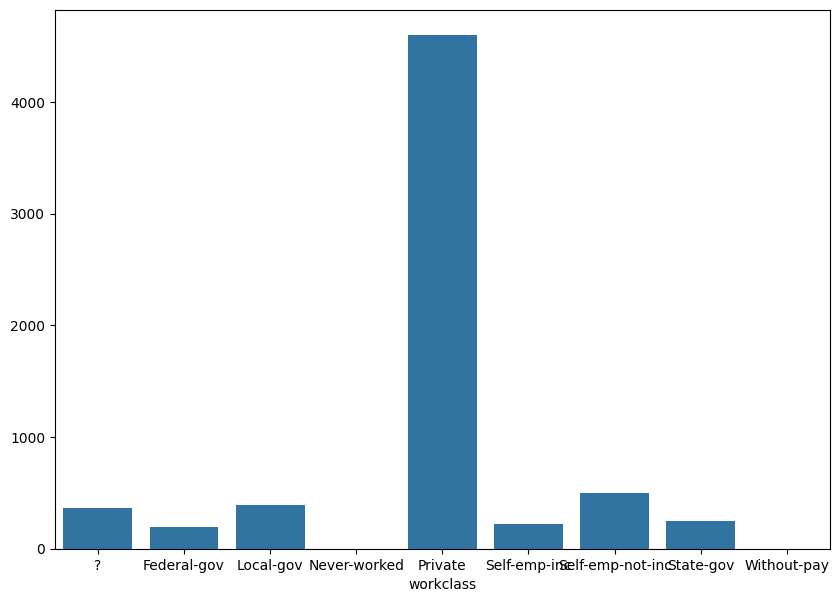

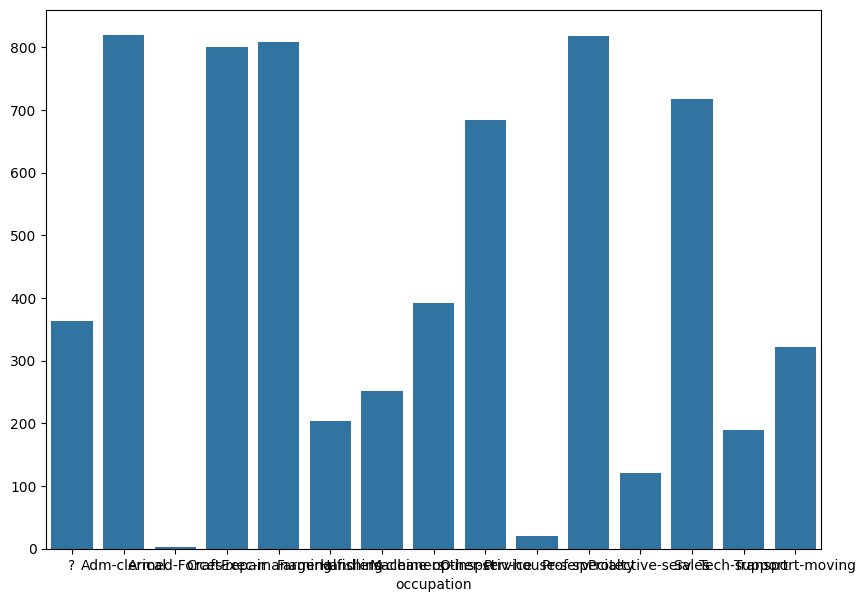

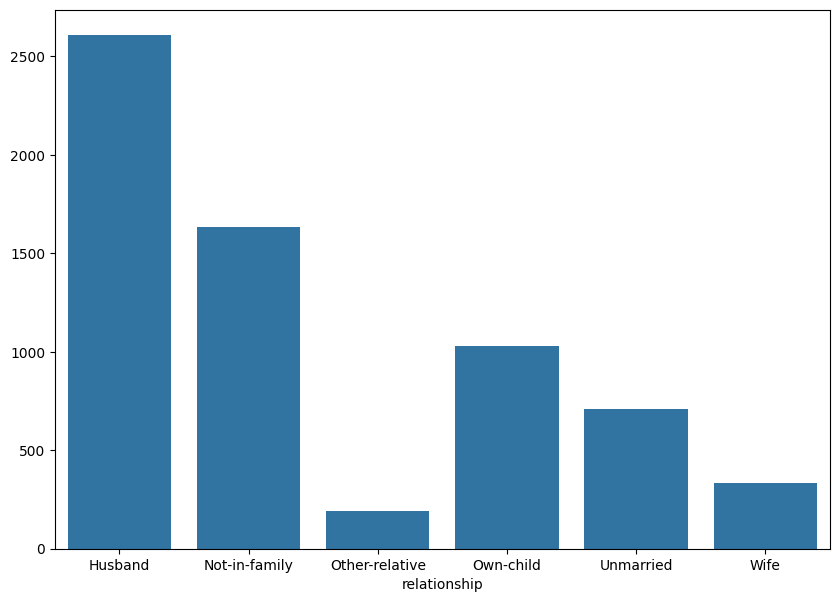

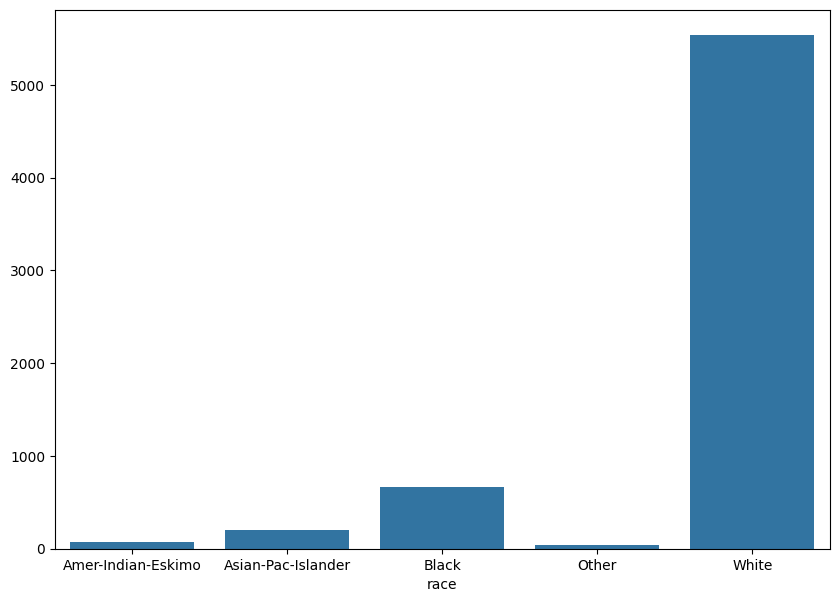

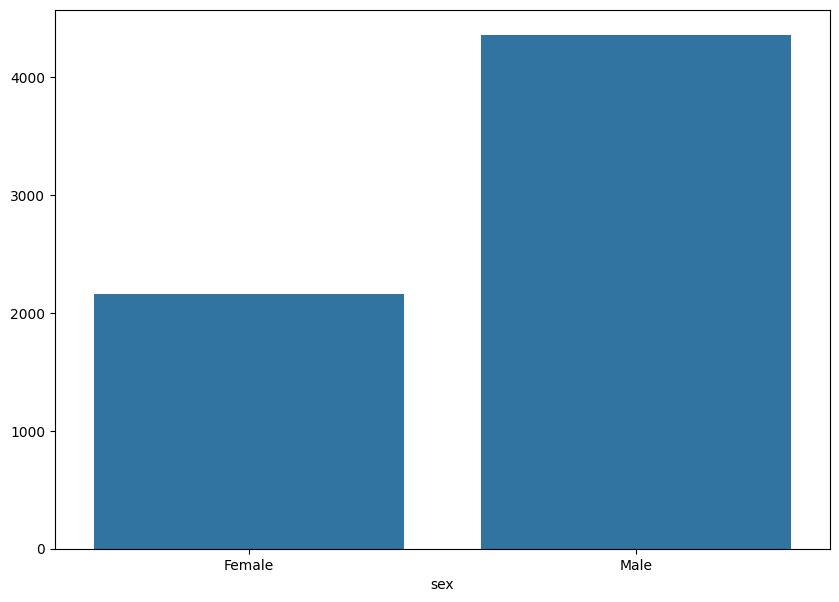

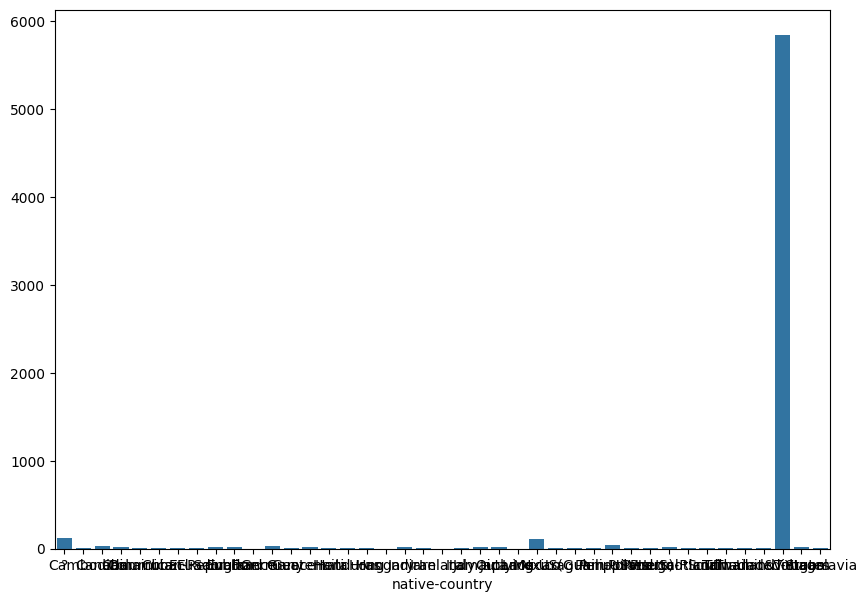

In [ ]:
import os

if not os.path.exists('pictures'):
  os.makedirs('pictures')

df_cat = df[cat_features]
for i, column in enumerate(cat_features):
  plt.figure(i)
  plt.gcf().set_size_inches(10,7)
  sns.barplot(x=df_cat[[column]].groupby(df_cat[column]).count().index, y=df_cat[column].groupby(df_cat[column]).count().to_numpy())
  print(column)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df[df.eq('?').any(axis=1)]

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,20,?,201490,10,?,Own-child,White,Male,0,0,40,United-States
10,78,?,363134,9,?,Not-in-family,White,Female,0,0,1,United-States
25,18,?,78567,10,?,Own-child,White,Male,0,0,30,United-States
72,47,?,109832,9,?,Husband,White,Male,5178,0,30,Canada
85,32,Self-emp-not-inc,62165,13,Exec-managerial,Husband,Black,Male,0,0,40,?
...,...,...,...,...,...,...,...,...,...,...,...,...
6443,32,?,143699,10,?,Unmarried,White,Female,0,0,40,United-States
6444,82,?,194590,11,?,Not-in-family,White,Female,0,0,8,United-States
6457,48,?,184682,9,?,Own-child,White,Female,0,0,18,United-States
6477,22,?,175586,9,?,Unmarried,Black,Female,0,0,35,United-States


In [ ]:
df[df.eq(' ').any(axis=1)]

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label


In [ ]:
df_drop_nans = df.replace('?', np.nan)
df_drop_nans = df_drop_nans.dropna()
print('Число строк содержащих хоть один пропуск: ', len(df)-len(df_drop_nans))

Число строк содержащих хоть один пропуск:  1914


In [ ]:
df_drop_nans_dummies = pd.get_dummies(df_drop_nans, drop_first=True)
print('Число полученных признаков: ', df_drop_nans_dummies.shape[1]-1)
df_drop_nans_dummies

Число полученных признаков:  75


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,43,101950,14,0,0,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,40,24763,10,6849,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,113936,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,51,237630,9,7298,0,50,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26044,39,421633,10,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26045,55,82098,9,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26046,26,50053,13,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_drop_nans_dummies = pd.get_dummies(df_drop_nans, drop_first=True)
print('Число полученных признаков: ', df_drop_nans_dummies.shape[1]-1)
df_drop_nans_dummies

Число полученных признаков:  75


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,43,101950,14,0,0,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,40,24763,10,6849,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,113936,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,51,237630,9,7298,0,50,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26044,39,421633,10,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26045,55,82098,9,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26046,26,50053,13,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
mean, score = build_model(df_drop_nans_dummies)
print('Выборочное среднее столбца fnlwgt: ', mean)
print('F_1(WEIGHTWD) модели: ', score)

Выборочное среднее столбца fnlwgt:  0.12253615969782165
F_1(WEIGHTWD) модели:  0.6228926353149955


In [ ]:
df_imputed= df.replace('?', np.nan)
df_imputed = df_imputed.fillna(df_imputed.mode().iloc[0])
df_imputed

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,Private,122244,9,Prof-specialty,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [ ]:
df_imputed_dummies = pd.get_dummies(df_imputed, drop_first=True)
df_imputed_dummies

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,43,101950,14,0,0,45,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,20,122244,9,0,0,28,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,40,24763,10,6849,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,113936,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26044,39,421633,10,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26045,55,82098,9,0,0,55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26046,26,50053,13,0,0,55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
mean, score = build_model(df_imputed_dummies)
print('Выборочное среднее столбца fnlwgt: ', mean)
print('F_1(weighted) модели: ', score)

Выборочное среднее столбца fnlwgt:  0.1419259023276068
F_1(weighted) модели:  0.623409669211196
